<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [2]:
#import required libraries
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import pandas as pd 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Data acquisition of the users.dat 
usres_df = pd.read_table('C:\\Users\\Lama\\Downloads\\Projects (1)\\Projects for Submission\\Project4_Movielens\\users.dat', engine='python',sep='::', names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

In [4]:
usres_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
#Data acquisition of the movies.dat
movies_df = pd.read_table('C:\\Users\\Lama\\Downloads\\Projects (1)\\Projects for Submission\\Project4_Movielens\\movies.dat', engine='python',sep='::', names=["MovieID", "Title", "Genres"])

In [6]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
#Data acquisition of the ratings.dat
ratings_df = pd.read_table('C:\\Users\\Lama\\Downloads\\Projects (1)\\Projects for Submission\\Project4_Movielens\\ratings.dat', engine='python',sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

In [8]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


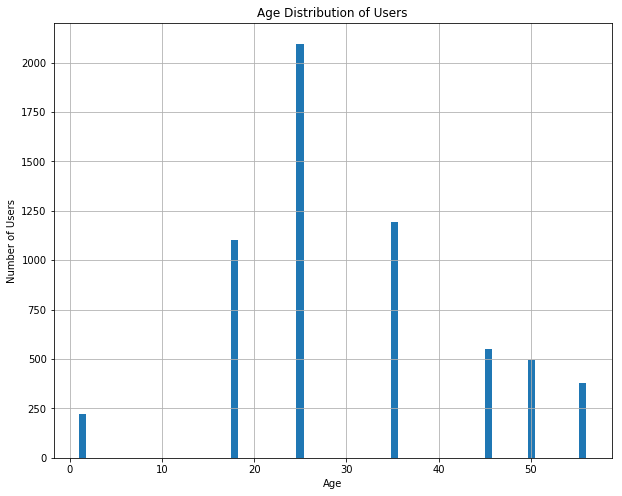

In [9]:
#Visualize user age distribution
plt.figure(figsize=(10,8))
usres_df['Age'].hist(bins=70)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

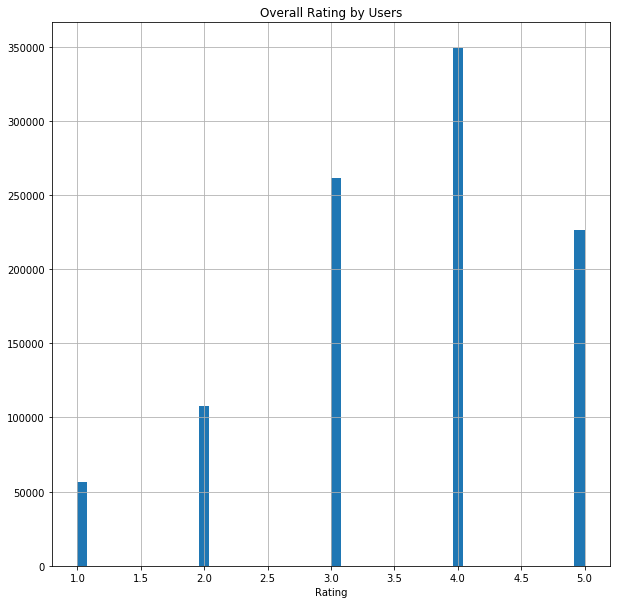

In [11]:
#Visualize overall rating by users
plt.figure(figsize=(10,10))
ratings_df['Rating'].hist(bins=50)
plt.title('Overall Rating by Users')
plt.xlabel('Rating')
#plt.ylabel('Number of Users')
plt.show()

In [14]:
#mergre rating and users datasets
rating_users_merge = pd.merge(usres_df, ratings_df, on=['UserID'])
rating_users_merge.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [16]:
#mergre with movie dataset 
movies_rating_users_merge = pd.merge(rating_users_merge, movies_df, on=['MovieID'])
movies_rating_users_merge.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [17]:
movies_rating_users_merge = movies_rating_users_merge.drop('Genres', 1)
movies_rating_users_merge.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975)
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975)
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975)
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975)
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975)


In [23]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
movies_rating_users_merge['age_group'] = pd.cut(movies_rating_users_merge.Age, range(0, 81, 10), right=False, labels=labels)
movies_rating_users_merge[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,1,0-9
1,56,50-59
2,25,20-29
4,50,50-59
5,18,10-19
9,45,40-49
20,35,30-39


In [25]:
movie_title = movies_rating_users_merge.groupby('Title')
toyStory_movie = movie_title.get_group('Toy Story (1995)')
toyStory_movie.shape

(2077, 10)

In [27]:
toyStory_movie

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,age_group
41626,1,F,1,10,48067,1,5,978824268,Toy Story (1995),0-9
41627,6,F,50,9,55117,1,4,978237008,Toy Story (1995),50-59
41628,8,M,25,12,11413,1,4,978233496,Toy Story (1995),20-29
41629,9,M,25,17,61614,1,5,978225952,Toy Story (1995),20-29
41630,10,F,35,1,95370,1,5,978226474,Toy Story (1995),30-39
41631,18,F,18,3,95825,1,4,978154768,Toy Story (1995),10-19
41632,19,M,1,10,48073,1,5,978555994,Toy Story (1995),0-9
41633,21,M,18,16,99353,1,3,978139347,Toy Story (1995),10-19
41634,23,M,35,0,90049,1,4,978463614,Toy Story (1995),30-39
41635,26,M,25,7,23112,1,3,978130703,Toy Story (1995),20-29


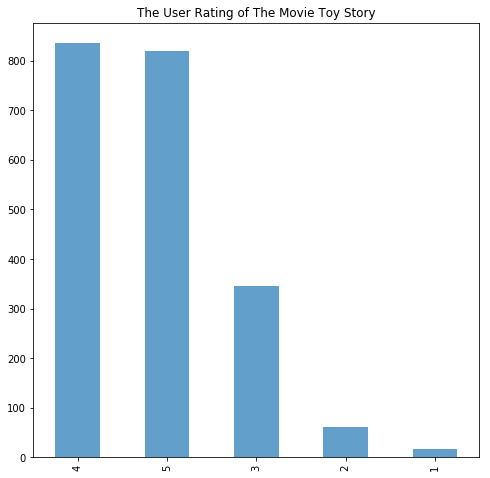

In [28]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(8,8))
toyStory_movie['Rating'].value_counts().plot(kind='bar', alpha=0.7)
plt.title('The User Rating of The Movie Toy Story')
plt.show()

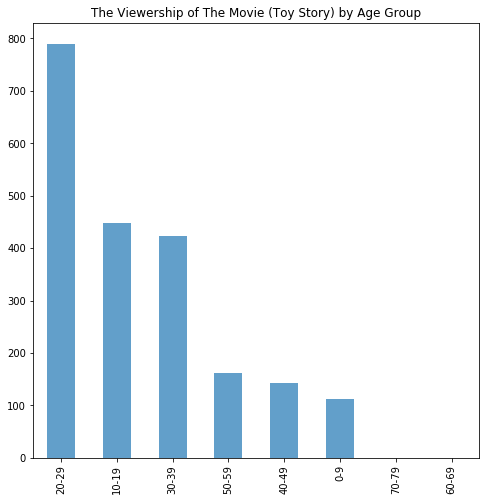

In [30]:
#Find and visualize the viewership of the movie “Toy Story” by age group
plt.figure(figsize=(8,8))
toyStory_movie['age_group'].value_counts().plot(kind='bar', alpha=0.7)
plt.title('The Viewership of The Movie (Toy Story) by Age Group')
plt.show()

In [31]:
toyStory_movie[['Title', 'age_group']]

,Title,age_group
41626,Toy Story (1995),0-9
41627,Toy Story (1995),50-59
41628,Toy Story (1995),20-29
41629,Toy Story (1995),20-29
41630,Toy Story (1995),30-39
41631,Toy Story (1995),10-19
41632,Toy Story (1995),0-9
41633,Toy Story (1995),10-19
41634,Toy Story (1995),30-39
41635,Toy Story (1995),20-29


In [32]:
#Top 25 most rated movies 
most_rated_movies= movies_rating_users_merge.groupby('Title').size().sort_values(ascending=False)[:25]
most_rated_movies

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [33]:
most_rated_movies_df = pd.DataFrame(most_rated_movies)
most_rated_movies_df.shape
most_rated_movies_df.reset_index(inplace=True)
most_rated_movies_df.columns =["Title", "Counts"]

In [34]:
most_rated_movies_df

,Title,Counts
0,American Beauty (1999),3428
1,Star Wars: Episode IV - A New Hope (1977),2991
2,Star Wars: Episode V - The Empire Strikes Back...,2990
3,Star Wars: Episode VI - Return of the Jedi (1983),2883
4,Jurassic Park (1993),2672
5,Saving Private Ryan (1998),2653
6,Terminator 2: Judgment Day (1991),2649
7,"Matrix, The (1999)",2590
8,Back to the Future (1985),2583
9,"Silence of the Lambs, The (1991)",2578


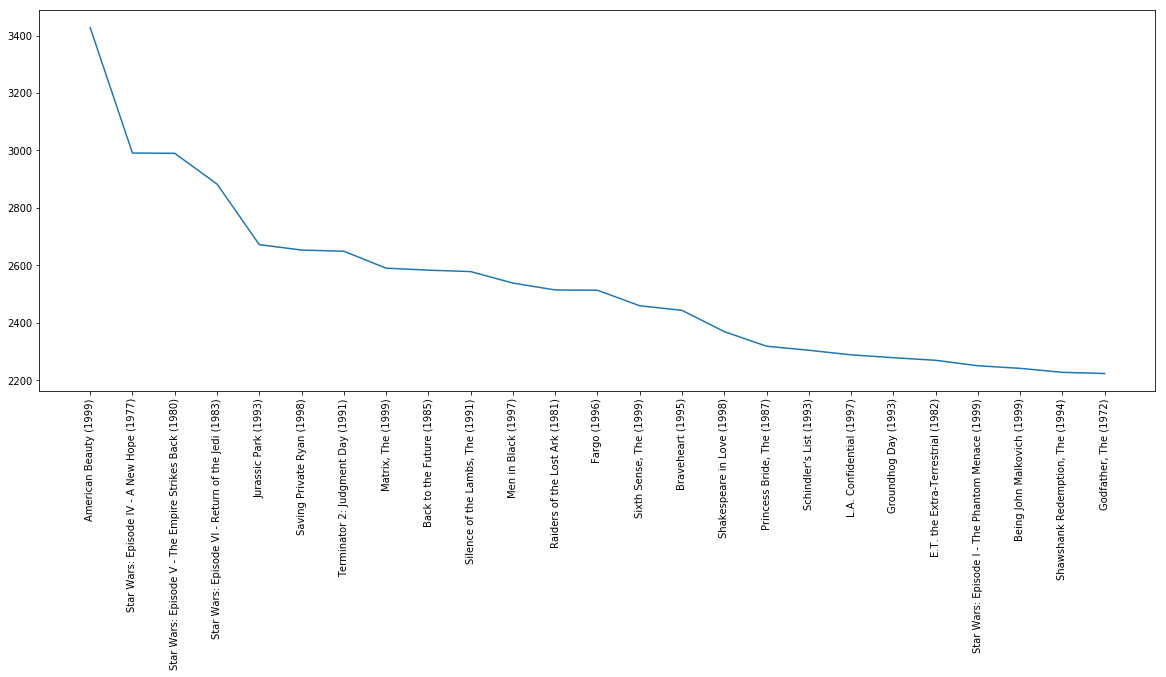

In [35]:
plt.figure(figsize=(20,7))
plt.plot(most_rated_movies_df['Title'], most_rated_movies_df['Counts'])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
#Find the rating for a particular user of user id = 2696
userID_2696 = movies_rating_users_merge['UserID'] == 2696
userID_2696_rate = pd.DataFrame(movies_rating_users_merge[userID_2696])
userID_2696_rate

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,age_group
24345,2696,M,25,7,24210,1270,2,973308676,Back to the Future (1985),20-29
29848,2696,M,25,7,24210,1097,3,973308690,E.T. the Extra-Terrestrial (1982),20-29
244232,2696,M,25,7,24210,1617,4,973308842,L.A. Confidential (1997),20-29
250014,2696,M,25,7,24210,800,5,973308842,Lone Star (1996),20-29
273633,2696,M,25,7,24210,3386,1,973308842,JFK (1991),20-29
277808,2696,M,25,7,24210,3176,4,973308865,"Talented Mr. Ripley, The (1999)",20-29
371178,2696,M,25,7,24210,1711,4,973308904,Midnight in the Garden of Good and Evil (1997),20-29
377250,2696,M,25,7,24210,1589,3,973308865,Cop Land (1997),20-29
598042,2696,M,25,7,24210,1783,4,973308865,Palmetto (1998),20-29
603189,2696,M,25,7,24210,1892,4,973308904,"Perfect Murder, A (1998)",20-29


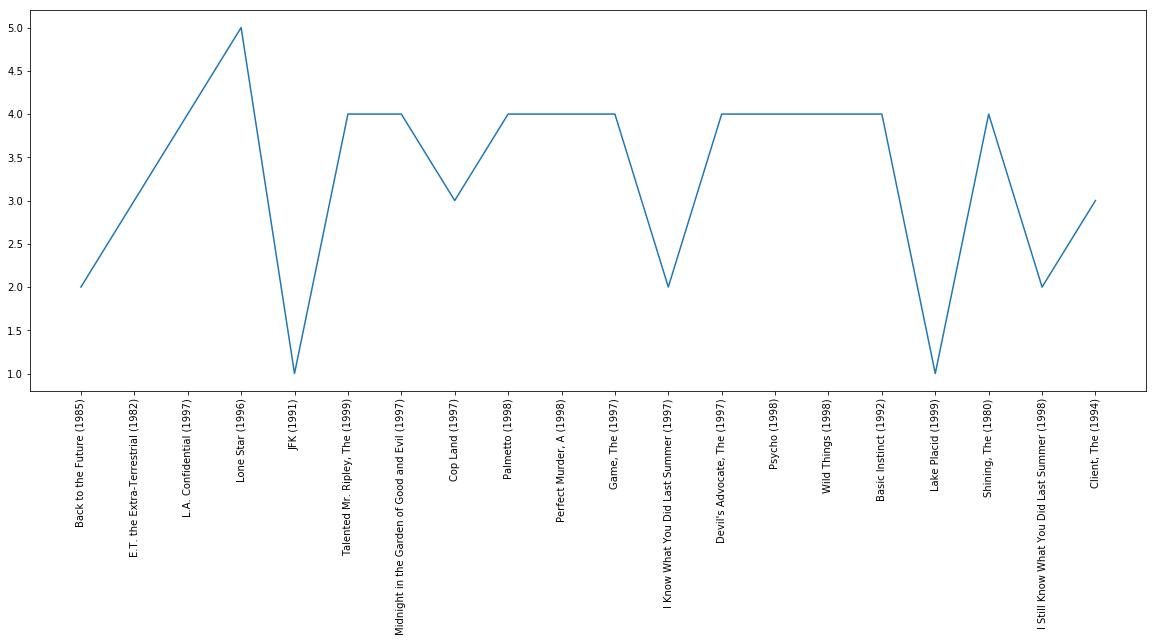

In [43]:
#Visualize the rating data by user of user id = 2696
plt.figure(figsize=(20,7))
plt.plot(userID_2696_rate['Title'], userID_2696_rate['Rating'])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
#Find out all the unique genres 
unique_genre= movies_df['Genres'].unique().tolist()
len(unique_genre)

301

In [48]:
#Split the geners
unique_genre = movies_df['Genres'].str.get_dummies('|')

In [49]:
unique_genre

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
unique_genre = movies_df.join(movies_df.pop('Genres').str.get_dummies('|'))

In [51]:
unique_genre

,MovieID,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
#Perform machine learning on first 500 extracted records
#First 500 extracted records
first_500_records = movies_rating_users_merge[:500]
first_500_records

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,age_group
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),0-9
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),50-59
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),20-29
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),20-29
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),50-59
5,18,F,18,3,95825,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),10-19
6,19,M,1,10,48073,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),0-9
7,24,F,25,7,10023,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),20-29
8,28,F,25,1,14607,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),20-29
9,33,M,45,3,55421,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),40-49


In [78]:
#Use the following features:movie id,age,occupation
features = first_500_records[['MovieID','Age','Occupation']]
features

,MovieID,Age,Occupation
0,1193,1,10
1,1193,56,16
2,1193,25,12
3,1193,25,7
4,1193,50,1
5,1193,18,3
6,1193,1,10
7,1193,25,7
8,1193,25,1
9,1193,45,3


In [79]:
#Use rating as label
labels = first_500_records[['Rating']]
labels

,Rating
0,5
1,5
2,4
3,4
4,5
5,4
6,5
7,5
8,3
9,5


In [80]:
#Create train and test data set 
from sklearn.model_selection import train_test_split

In [129]:
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state= 0)

In [130]:
len(train)

400

In [131]:
len(test)

100

In [132]:
train.shape, test.shape, train_labels.shape, test_labels.shape

((400, 3), (100, 3), (400, 1), (100, 1))

In [133]:
#import the logistic regression model for machine learning 
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()

In [134]:
logReg.fit(train, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [135]:
label_pred = logReg.predict(test)

In [136]:
label_pred

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [139]:
logReg.score(test, test_labels)

0.6

Text(0.5,0,'MovieID')

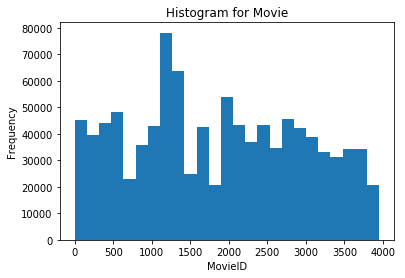

In [140]:
#Create a histogram for movie, age, and occupation

#Create a histogram for movie
movies_rating_users_merge.MovieID.plot.hist(bins=25)
plt.title("Histogram for Movie")
plt.xlabel('MovieID')

Text(0.5,0,'Age')

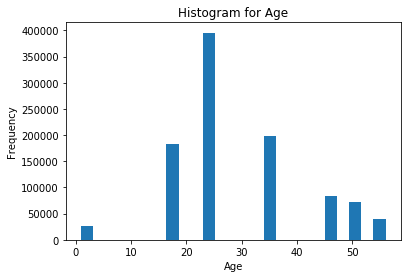

In [141]:
#Create a histogram for age
movies_rating_users_merge.Age.plot.hist(bins=25)
plt.title("Histogram for Age")
plt.xlabel('Age')

Text(0.5,0,'Occupation')

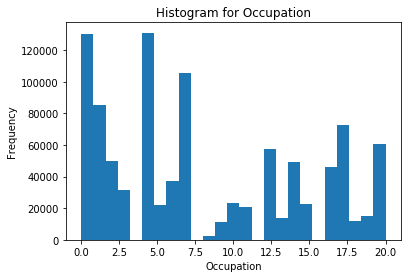

In [142]:
#Create a histogram for occupation
movies_rating_users_merge.Occupation.plot.hist(bins=25)
plt.title("Histogram for Occupation")
plt.xlabel('Occupation')